# Perceval Quest
#### Author: *Valentin Deumier*

Our goal is to start by creating a 'classical' neural network and train it on the famous MNIST handwritten digits dataset, and then try to upgrade it by using Linear Optical Quantum Computing, in hope to increase the accuracy of the model and lower the duration of training.

### <u>1: A classical convolutional NN on the reduced MNIST data set</u>

Let's first start by loading the librairies and visualize the data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

In [20]:
# Parameters
IMG_SIZE = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 30

In [15]:
# Data into numpy arrays
def load_data(filename):

    data = pd.read_csv(filename)
    X = np.array(data['image'].str.split(',', expand=True).values)

    # Remove the [ ] from the image data (fastest method I found)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X[i, j] = X[i, j].replace('[', '').replace(']', '')
    X = X.astype(float)

    y = data['label'].values

    X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0      # Reshape and normalize
    y = to_categorical(y, NUM_CLASSES)
    return X, y

# Get the absolute path to the data folder
script_dir = os.getcwd()
data_dir = os.path.join(script_dir, 'data')

# Load the data
train_file = os.path.join(data_dir, 'train.csv')
X_train, y_train = load_data(train_file)
val_file = os.path.join(data_dir, 'val.csv')
X_val, y_val = load_data(val_file)

Training data:                   Validation data:
Class     Count     Percentage        Class     Count     Percentage
0         604       10.07%             0         49        8.17%
1         725       12.08%             1         74        12.33%
2         619       10.32%             2         67        11.17%
3         631       10.52%             3         49        8.17%
4         559       9.32%             4         64        10.67%
5         535       8.92%             5         66        11.00%
6         572       9.53%             6         55        9.17%
7         622       10.37%             7         54        9.00%
8         564       9.40%             8         52        8.67%
9         569       9.48%             9         70        11.67%

Example digits from the training data:


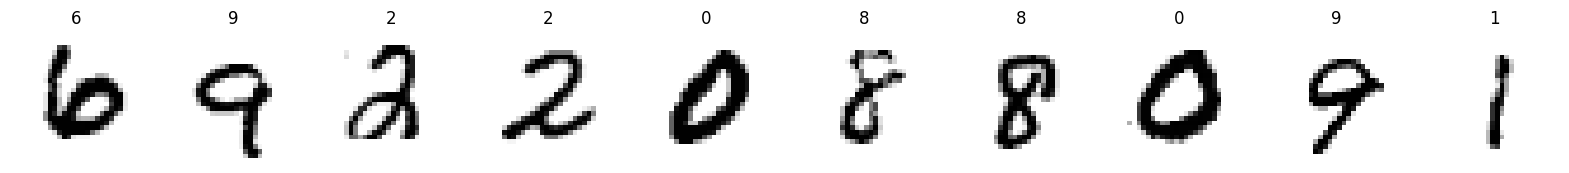

In [16]:
# Check proportions of each class
train_counts = pd.Series(y_train.argmax(axis=1)).value_counts()
val_counts = pd.Series(y_val.argmax(axis=1)).value_counts()

train_percentages = (train_counts / len(y_train)) * 100
val_percentages = (val_counts / len(y_val)) * 100

print('Training data:                   Validation data:')
print(f"{'Class':<10}{'Count':<10}{'Percentage':<10}        {'Class':<10}{'Count':<10}{'Percentage':<10}")
for i in range(NUM_CLASSES):
    print(f"{i:<10}{train_counts[i]:<10}{train_percentages[i]:.2f}%             {i:<10}{val_counts[i]:<10}{val_percentages[i]:.2f}%")

# Visualize the training data

def plot_digits(digits, labels, num_digits=10):
    fig, axes = plt.subplots(1, num_digits, figsize=(20, 20))
    for i in range(num_digits):
        axes[i].imshow(digits[i], cmap='gray_r')
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

print('')
print("Example digits from the training data:")
plot_digits(X_train, y_train.argmax(axis=1))

We build the CNN using TensorFlow.

In [ ]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_2'))
# Now the size of the image is 5x5x8

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE)

# Evaluate the model
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 11, 11, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,058 (144.76 KB)

 Trainable params: 37,058 (144.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.1225 - loss: 2.3018 - val_accuracy: 0.1233 - val_loss: 2.3032
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1144 - loss: 2.3004 - val_accuracy: 0.1233 - val_loss: 2.2947
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1434 - loss: 2.2737 - val_accuracy: 0.2083 - val_loss: 2.1446
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2436 - loss: 2.0644 - val_accuracy: 0.3350 - val_loss: 1.7628
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3635 - loss: 1.7052 - val_accuracy: 0.4933 - val_loss: 1.3939
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4586 - loss: 1.4401 - val_accuracy: 0.6383 - val_loss: 1.1493
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5543 - loss: 1.2315 - val_accuracy: 0.6850 - val_loss: 0.9510
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6095 - loss: 1.0638 - val_accuracy: 0.7000 - v

We can see that the model has a 87% accuracy on the test set. Let's visualize the digits that it gets wrong.

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


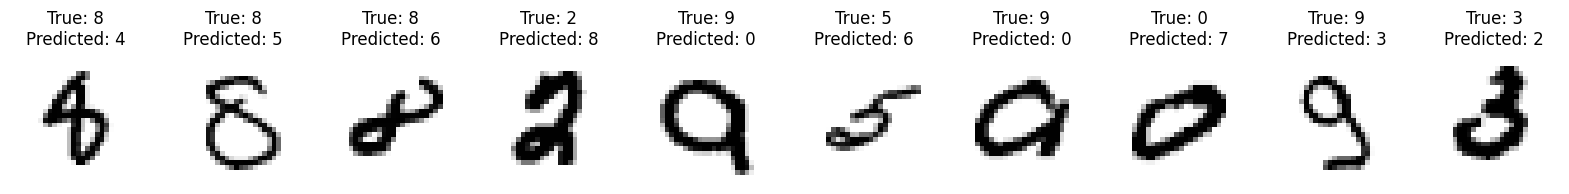

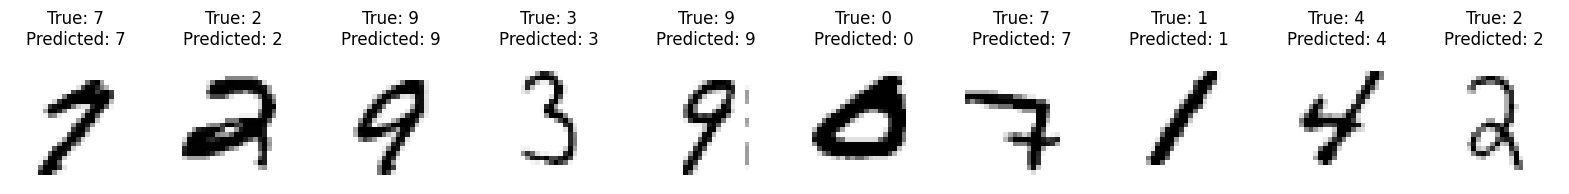

In [35]:
# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Identify the indices where the predictions are incorrect
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Identify the indices where the predictions are correct
correct_indices = np.where(y_pred_classes == y_true)[0]

# Display some of the incorrect predictions
def plot_wrong_digits(digits, labels, num_digits=10):
    fig, axes = plt.subplots(1, num_digits, figsize=(20, 20))
    for i in range(num_digits):
        axes[i].imshow(digits[i], cmap='gray_r')
        axes[i].set_title('True: {}\nPredicted: {}'.format(labels[i], y_pred_classes[incorrect_indices[i]]))
        axes[i].axis('off')
    plt.show()

# Display some of the correct predictions
def plot_correct_digits(digits, labels, num_digits=10):
    fig, axes = plt.subplots(1, num_digits, figsize=(20, 20))
    for i in range(num_digits):
        axes[i].imshow(digits[i], cmap='gray_r')
        axes[i].set_title('True: {}\nPredicted: {}'.format(labels[i], y_pred_classes[correct_indices[i]]))
        axes[i].axis('off')
    plt.show()

plot_wrong_digits(X_val[incorrect_indices], y_true[incorrect_indices])
plot_correct_digits(X_val[correct_indices], y_true[correct_indices])

Just for testing purposes, let's try to draw our own digits and give it to the model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


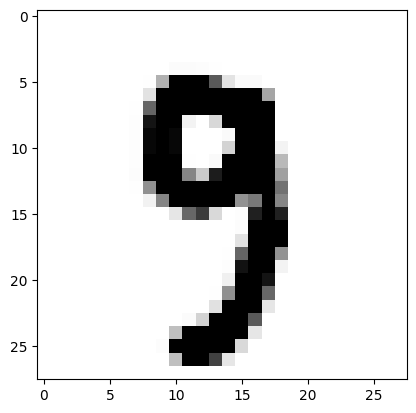

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [23]:
import tkinter as tk

class DrawDigits:
    def __init__(self, master):
        self.master = master
        self.canvas = tk.Canvas(master, width=IMG_SIZE*10, height=IMG_SIZE*10, bg='white')
        self.canvas.pack()
        self.canvas.bind("<B1-Motion>", self.paint)
        self.image = np.zeros((IMG_SIZE, IMG_SIZE))
        self.button = tk.Button(master, text="Predict", command=self.predict)
        self.button.pack()
        self.clear_button = tk.Button(master, text="Clear", command=self.clear)
        self.clear_button.pack()
        self.show_button = tk.Button(master, text="Show Image", command=self.show_image)
        self.show_button.pack()
        self.label = tk.Label(master, text="")
        self.label.pack()

    def paint(self, event):
        x, y = event.x, event.y
        self.canvas.create_rectangle(x-10, y-10, x+10, y+10, fill='black')
        for i in range(-2, 2):      # Draw a thicker line with a Gaussian distribution
            for j in range(-2, 2):
                if 0 <= x//10 + i < IMG_SIZE and 0 <= y//10 + j < IMG_SIZE:
                    self.image[y//10 + j, x//10 + i] += np.exp(-(i**2 + j**2)*1.5)
        np.clip(self.image, 0, 1, out=self.image)

    def predict(self):
        self.image = self.image.reshape(1, IMG_SIZE, IMG_SIZE, 1)
        prediction = model.predict(self.image)
        self.label.config(text=f"Predicted Digit: {np.argmax(prediction)} with confidence {np.max(prediction)*100:.2f}%")
        self.image = self.image.reshape(IMG_SIZE, IMG_SIZE)

    def clear(self):
        self.canvas.delete("all")
        self.image = np.zeros((IMG_SIZE, IMG_SIZE))

    def show_image(self):
        plt.imshow(self.image, cmap='gray_r')
        plt.show()

root = tk.Tk()
drawer = DrawDigits(root)
root.mainloop()